<a href="https://colab.research.google.com/github/Akash-singh45/Restaurant-insights/blob/main/level_3__task_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 **Task 1**
 **Task: Restaurant Reviews**

 Analyze the text reviews to identify the most common positive and negative keywords.

 Calculate the average length of reviews and explore if there is a relationship betweenreview length and rating.

 **Task 2**
 **Task: Votes Analysis**

 Identify the restaurants with the highest and lowest number of votes.

 Analyze if there is a correlation between thenumber of votes and the rating of a restaurant.

 **Task 3**
 **Task: Price Range vs. Online Delivery and Table Booking**

 Analyze if there is a relationship between the price range and the availability of onlinedelivery and table booking.

 Determine if higher-priced restaurants aremore likely to offer these services



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Dataset .csv')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [12]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (already loaded as df)
# Clean and preprocess the reviews
df['Rating text'] = df['Rating text'].astype(str)

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return words

# Apply cleaning
df['tokens'] = df['Rating text'].apply(clean_text)

# Flatten all tokens
all_words = [word for tokens in df['tokens'] for word in tokens]

# Count word frequencies
word_counts = Counter(all_words)
print("\nMost common words:", word_counts.most_common(10))

# Optional: Define simple positive/negative keyword lists
positive_words = ['excellent', 'good', 'amazing', 'delicious', 'perfect']
negative_words = ['poor', 'bad', 'worst', 'average', 'disappointing']

# Count positive and negative words
pos_counts = {word: word_counts[word] for word in positive_words}
neg_counts = {word: word_counts[word] for word in negative_words}
print("\nPositive keywords:", pos_counts)
print("Negative keywords:", neg_counts)

# Calculate review length
df['review_length'] = df['Rating text'].apply(lambda x: len(x.split()))
avg_length = df['review_length'].mean()
print(f"\nAverage review length: {avg_length:.2f} words")







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most common words: [('average', 3737), ('good', 3179), ('rated', 2148), ('excellent', 301), ('poor', 186)]

Positive keywords: {'excellent': 301, 'good': 3179, 'amazing': 0, 'delicious': 0, 'perfect': 0}
Negative keywords: {'poor': 186, 'bad': 0, 'worst': 0, 'average': 3737, 'disappointing': 0}

Average review length: 1.34 words


In [13]:
# Correlation between review length and rating
corr = df['review_length'].corr(df['Aggregate rating'])
print(f"\nCorrelation between review length and rating: {corr:.2f}")


Correlation between review length and rating: -0.60


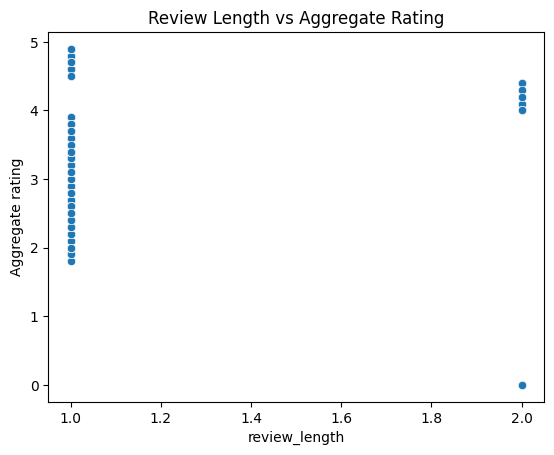

In [10]:
# Plot relationship
sns.scatterplot(x='review_length', y='Aggregate rating', data=df)
plt.title('Review Length vs Aggregate Rating')
plt.show()

✅ Task 2: Votes Analysis

✔ Find restaurant with highest and lowest votes

✔ Analyze correlation between votes and ratings


Restaurant with highest votes:
 Restaurant Name      Toit
Votes               10934
Aggregate rating      4.8
Name: 728, dtype: object

Restaurant with lowest votes:
 Restaurant Name     Cantinho da Gula
Votes                              0
Aggregate rating                 0.0
Name: 69, dtype: object

Correlation between votes and rating: 0.31


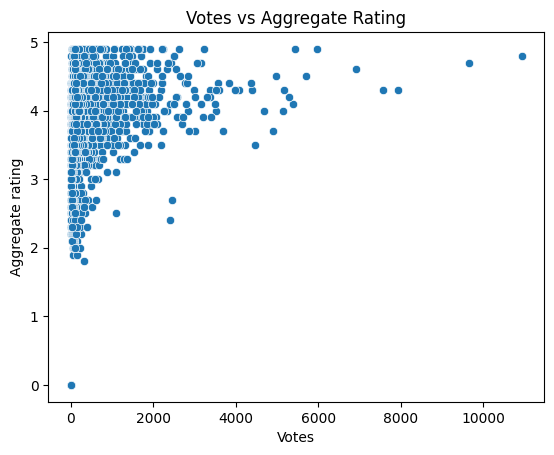

In [14]:
# Convert Votes to numeric (if not already)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Highest votes
max_votes_restaurant = df.loc[df['Votes'].idxmax()]
print("\nRestaurant with highest votes:\n", max_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

# Lowest votes
min_votes_restaurant = df.loc[df['Votes'].idxmin()]
print("\nRestaurant with lowest votes:\n", min_votes_restaurant[['Restaurant Name', 'Votes', 'Aggregate rating']])

# Correlation between votes and ratings
votes_corr = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between votes and rating: {votes_corr:.2f}")

# Plot
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.show()


✅ Task 3: Price Range vs Online Delivery & Table Booking

✔ Analyze relationship between price range and online delivery / table booking.

✔ Check if higher-priced restaurants offer these services more


Online delivery by price range:
 Has Online delivery         no        yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369

Table booking by price range:
 Has Table booking         no        yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


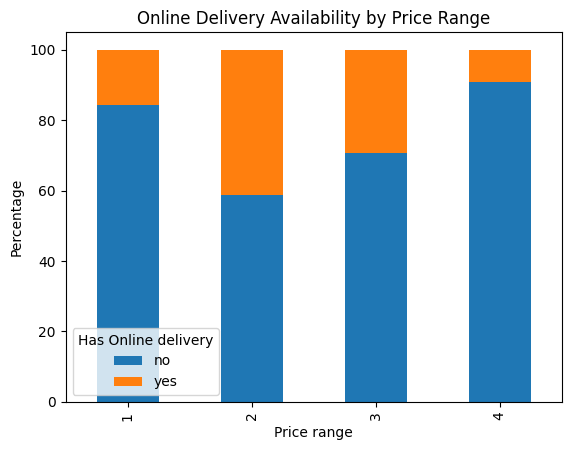

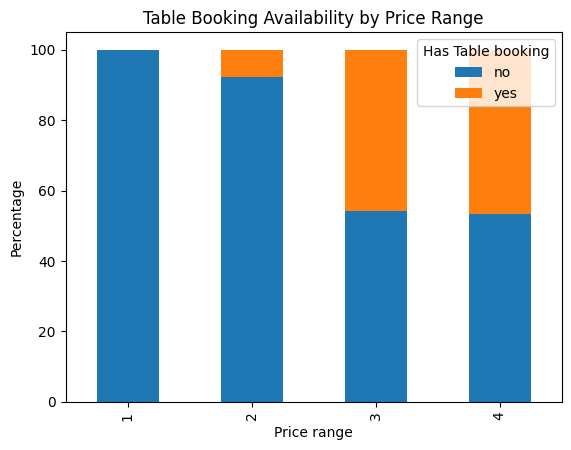

In [15]:
# Clean categorical columns
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()

# Group and calculate proportion
online_delivery_table = pd.crosstab(df['Price range'], df['Has Online delivery'], normalize='index') * 100
table_booking_table = pd.crosstab(df['Price range'], df['Has Table booking'], normalize='index') * 100

print("\nOnline delivery by price range:\n", online_delivery_table)
print("\nTable booking by price range:\n", table_booking_table)

# Plot online delivery
online_delivery_table.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.ylabel('Percentage')
plt.show()

# Plot table booking
table_booking_table.plot(kind='bar', stacked=True)
plt.title('Table Booking Availability by Price Range')
plt.ylabel('Percentage')
plt.show()
